### Fashion Industry Brand Price Prediction
A fashion industry dataset is analysed to help with price predictions and make crucial business choices, in an industry that is characterised by short product life cycles, a wide diversity of products, volatile and unpredictable demand, and a lengthy and rigid supply chains. There are many variables that affect fashion items, and it is crucial to understand these variables.

#### Feature Description
- brand_id - The numerical value assigned to each fashion brand
- brand_name - The name of each fashion product
- p_id - The product id is the value assigned to different products in the store
- name - The description of each brand
- price - The price of the brand products
- colour - The colour of each brand
- brand - The name of each fashion product, has same attribute with brand_name
- ratingCount - The total number of weighted votes/ratings by customers
- avg_rating - The rating count divided by number of customer votes
- description - The specification of each fashion brand
- p_attributes - The product attributes which detailed the brand size, type, measurements and body shape
- NewBrand - The combination of the variables in both brand_id and brand columns

In [326]:
#import pandas and numpy for data manipulation
import pandas as pd
import numpy as np
#import pyplot and seaborn for visualization
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
%matplotlib inline
import seaborn as sns

## Data Inspection

In [328]:
# load the merged datasets
data = pd.read_csv('fashion_data.csv', index_col=False)

In [329]:
data.head()

,brand_id,brand_name,p_id,name,price,colour,brand,ratingCount,avg_rating,description,p_attributes,NewBrand
0,555,Max,19000284.0,max Peach-Coloured Print Top,169.0,Peach,max,NaN,NaN,<ul><li>Peach-coloured regular top</li><li>Gra...,{'Body or Garment Size': 'Garment Measurements...,"555 ,max"
1,555,Max,14432274.0,max Cream Regular Top,199.0,Cream,max,262.0,4.576336,<ul><li>Cream regular top</li><li>Solid</li><l...,"{'Body Shape ID': '443,333,324,424', 'Body or ...","555 ,max"
2,555,Max,14432282.0,max White Regular Top,199.0,White,max,308.0,4.464286,<ul> <li> White regular top </li> <li> Solid <...,"{'Body Shape ID': '443,333,324,424', 'Body or ...","555 ,max"
3,438,Juniors By Lifestyle,18988158.0,Juniors by Lifestyle Kids-Girls White Pure Cot...,249.0,White,Juniors by Lifestyle,NaN,NaN,<ul> <li> White regular top </li> <li> Abstrac...,{'Body or Garment Size': 'Garment Measurements...,"438 ,Juniors by Lifestyle"
4,431,Jockey,14846678.0,Jockey Women Black Pure Cotton Solid Tank Top,295.0,Black,Jockey,117.0,4.504273,"Black&nbsp;solid tank top, scoop neck, sleevel...","{'Body Shape ID': '333,424', 'Body or Garment ...","431 ,Jockey"


In [330]:
data.tail()

,brand_id,brand_name,p_id,name,price,colour,brand,ratingCount,avg_rating,description,p_attributes,NewBrand
14301,801,Shaily,11411284.0,Shaily Off-White & Pink Embroidered Semi-Stitc...,30090.0,Off White,Shaily,5.0,5.00,"Off-White lehenga choli with dupatta, has thre...","{'Blouse Closure': 'NA', 'Blouse Fabric': 'Pol...","801 ,Shaily"
14302,734,Readiprint Fashions,18536426.0,Readiprint Fashions Blue & Golden Embroidered ...,30500.0,Blue,Readiprint Fashions,NaN,NaN,Blue and golden embroidered lehenga choli with...,"{'Blouse Closure': 'NA', 'Blouse Fabric': 'Art...","734 ,Readiprint Fashions"
14303,734,Readiprint Fashions,15721148.0,Readiprint Fashions Magenta Embroidered Semi-S...,33350.0,Magenta,Readiprint Fashions,4.0,3.25,Magenta embroidered lehenga choli with dupatta...,"{'Blouse Closure': 'NA', 'Blouse Fabric': 'Raw...","734 ,Readiprint Fashions"
14304,590,Moksha Designs,10898748.0,MOKSHA DESIGNS Maroon & Pink Embroidered Ready...,47999.0,Maroon,MOKSHA DESIGNS,NaN,NaN,"Maroon lehenga choli<br>Maroon blouse, three-q...","{'Blouse Closure': 'NA', 'Blouse Fabric': 'Vel...","590 ,MOKSHA DESIGNS"
14305,p_id,name,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"p_id ,"


In [331]:
data.describe()

,p_id,price,ratingCount,avg_rating
count,1.430500e+04,14305.000000,6578.000000,6578.000000
mean,1.569321e+07,2964.556798,183.612344,4.101165
std,3.151400e+06,2564.315666,779.757051,0.475717
min,7.016600e+04,169.000000,1.000000,1.000000
25%,1.413877e+07,1599.000000,9.000000,3.888889
50%,1.638248e+07,2200.000000,23.000000,4.180636
75%,1.808456e+07,3495.000000,80.000000,4.392823
max,1.941576e+07,47999.000000,21274.000000,5.000000


In [332]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14306 entries, 0 to 14305
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   brand_id      14306 non-null  object 
 1   brand_name    14306 non-null  object 
 2   p_id          14305 non-null  float64
 3   name          14305 non-null  object 
 4   price         14305 non-null  float64
 5   colour        14302 non-null  object 
 6   brand         14305 non-null  object 
 7   ratingCount   6578 non-null   float64
 8   avg_rating    6578 non-null   float64
 9   description   14305 non-null  object 
 10  p_attributes  14305 non-null  object 
 11  NewBrand      14306 non-null  object 
dtypes: float64(4), object(8)
memory usage: 1.3+ MB


In [333]:
data.shape
# The dataset has 14306 rows and 12 columns

(14306, 12)

- There are 14306 rows and 12 columns in the dataset

In [334]:
data.columns

Index(['brand_id', 'brand_name', 'p_id', 'name', 'price', 'colour', 'brand',
       'ratingCount', 'avg_rating', 'description', 'p_attributes', 'NewBrand'],
      dtype='object')

In [335]:
data.describe()

,p_id,price,ratingCount,avg_rating
count,1.430500e+04,14305.000000,6578.000000,6578.000000
mean,1.569321e+07,2964.556798,183.612344,4.101165
std,3.151400e+06,2564.315666,779.757051,0.475717
min,7.016600e+04,169.000000,1.000000,1.000000
25%,1.413877e+07,1599.000000,9.000000,3.888889
50%,1.638248e+07,2200.000000,23.000000,4.180636
75%,1.808456e+07,3495.000000,80.000000,4.392823
max,1.941576e+07,47999.000000,21274.000000,5.000000


### Data Cleaning
- Removing unneccesary columns
- Change data type
- Check for missing values
- Replacing missing values
- Check for Duplicates
- Deleting Duplicates

#### Removing unnecessary columns
- The 'brand' column, which has already been merged with 'brand_id' column to produce the 'NewBrand' column  is dropped from the dataset, since the columns contain same data value with brand_name

In [336]:
data.drop(columns=['brand'], inplace=True)

#### Check for Unique values

In [337]:
data.nunique()

brand_id         1021
brand_name       1021
p_id            14221
name            13880
price            1209
colour             49
ratingCount       829
avg_rating       2368
description     14230
p_attributes    13094
NewBrand         1021
dtype: int64

#### Checking for missing values
- Missing values are checked and replaced

In [338]:
# Check for missing values

data.isnull().sum().copy()

brand_id           0
brand_name         0
p_id               1
name               1
price              1
colour             4
ratingCount     7728
avg_rating      7728
description        1
p_attributes       1
NewBrand           0
dtype: int64

- There are several missing values in the data set, ratingCount and avg_rating columns are the columns with the highest missing values, consisting of 7728 values each. Eliminating the entire entry will shrink the dataset and have an impact on the machine learning model's accuracy. Thus, the missing values are replaced with their individual modes. Mode is the value that shows up most frequently in a data collection.

In [339]:
#Check the missing values under p_id
data[pd.isna(data["p_id"])]

,brand_id,brand_name,p_id,name,price,colour,ratingCount,avg_rating,description,p_attributes,NewBrand
14305,p_id,name,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"p_id ,"


In [340]:
#Check the missing values under name
data[pd.isna(data["name"])]

,brand_id,brand_name,p_id,name,price,colour,ratingCount,avg_rating,description,p_attributes,NewBrand
14305,p_id,name,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"p_id ,"


In [341]:
#Check the missing values under price
data[pd.isna(data["price"])]

,brand_id,brand_name,p_id,name,price,colour,ratingCount,avg_rating,description,p_attributes,NewBrand
14305,p_id,name,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"p_id ,"


In [342]:
#Check the missing values under p_attributes
data[pd.isna(data["p_attributes"])]

,brand_id,brand_name,p_id,name,price,colour,ratingCount,avg_rating,description,p_attributes,NewBrand
14305,p_id,name,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"p_id ,"


In [343]:
#Check the missing values under description
data[pd.isna(data["description"])]

,brand_id,brand_name,p_id,name,price,colour,ratingCount,avg_rating,description,p_attributes,NewBrand
14305,p_id,name,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"p_id ,"


- From the missing data above, the last row on the dataset, row 14306 contains null data all through and will be deleted

In [344]:
data = data.drop([14305])
data.tail(1)

,brand_id,brand_name,p_id,name,price,colour,ratingCount,avg_rating,description,p_attributes,NewBrand
14304,590,Moksha Designs,10898748.0,MOKSHA DESIGNS Maroon & Pink Embroidered Ready...,47999.0,Maroon,NaN,NaN,"Maroon lehenga choli<br>Maroon blouse, three-q...","{'Blouse Closure': 'NA', 'Blouse Fabric': 'Vel...","590 ,MOKSHA DESIGNS"


In [345]:
#Check the missing values under price
data[pd.isna(data["colour"])]

,brand_id,brand_name,p_id,name,price,colour,ratingCount,avg_rating,description,p_attributes,NewBrand
6428,516,Live Ok,19142060.0,LIVE OK Women Boyfriend Fit High-Rise Stretcha...,1999.0,NaN,NaN,NaN,"<ul> <li> Dark shade, no fade jeans </li> <li...","{'Add-Ons': 'NA', 'Body or Garment Size': 'To-...","516 ,LIVE OK"
7724,544,Mango,16124786.0,MANGO Women Hooded Sweatshirt,2390.0,NaN,NaN,NaN,"Solid sweatshirt has a hooded, short drop shou...","{'Body Shape ID': '443,424,324', 'Body or Garm...","544 ,MANGO"
12774,111,Baisacrafts,19145038.0,Baisacrafts Women Pure Cotton Kurta with Trous...,5450.0,NaN,NaN,NaN,Solid Kurta with Trousers with dupatta<br><br>...,"{'Add-Ons': 'NA', 'Body Shape ID': '333,424', ...","111 ,Baisacrafts"


In [346]:
#Mode of the colour column
data.loc[:,"colour"].mode()

0    Black
Name: colour, dtype: object

In [347]:
#Considering the 49 different unique colour types and large size of the dataset, the mode (Black)
#of Colour will be used to fill the missing values. The data type will be changed from object to category.

#change data type to category
data.colour = data.colour.astype("category")

# Use the mode to fill missing colour column
data['colour'].fillna(data['colour'].mode()[0], inplace=True)

In [348]:
#Check cleaned data for column "colour"
data[pd.isna(data["colour"])]

,brand_id,brand_name,p_id,name,price,colour,ratingCount,avg_rating,description,p_attributes,NewBrand


In [349]:
#Check the missing values under ratingCount
data[pd.isna(data["ratingCount"])]

,brand_id,brand_name,p_id,name,price,colour,ratingCount,avg_rating,description,p_attributes,NewBrand
0,555,Max,19000284.0,max Peach-Coloured Print Top,169.0,Peach,NaN,NaN,<ul><li>Peach-coloured regular top</li><li>Gra...,{'Body or Garment Size': 'Garment Measurements...,"555 ,max"
3,438,Juniors By Lifestyle,18988158.0,Juniors by Lifestyle Kids-Girls White Pure Cot...,249.0,White,NaN,NaN,<ul> <li> White regular top </li> <li> Abstrac...,{'Body or Garment Size': 'Garment Measurements...,"438 ,Juniors by Lifestyle"
12,237,Dreamz By Pantaloons,19168716.0,Dreamz by Pantaloons Women Round Neck Short Sl...,299.0,Black,NaN,NaN,<ul> <li> Black regular top </li> <li> Solid <...,"{'Body Shape ID': '443,333,424', 'Body or Garm...","237 ,Dreamz by Pantaloons"
13,237,Dreamz By Pantaloons,19168722.0,Dreamz by Pantaloons Women Round Neck Teal Top,299.0,Teal,NaN,NaN,<ul> <li> Teal regular top </li> <li> Solid </...,"{'Body Shape ID': '443,333,424', 'Body or Garm...","237 ,Dreamz by Pantaloons"
15,555,Max,19000300.0,max Girls White Printed Round Neck Top,329.0,White,NaN,NaN,<ul> <li> White regular top </li> <li> Convers...,{'Body or Garment Size': 'Garment Measurements...,"555 ,max"
...,...,...,...,...,...,...,...,...,...,...,...
14298,553,Masaba,16920512.0,Masaba Women White & Rose Gold Floral Foil Pri...,30000.0,White,NaN,NaN,"This co-ords set consists of a top, trouser, a...","{'Add-Ons': 'NA', 'Better Cotton Initiative': ...","553 ,Masaba"
14299,553,Masaba,16920516.0,Masaba Woman Black Tulip Cape Set,30000.0,Black,NaN,NaN,V-neckline&nbsp;<br>Full sleeves&nbsp;<br>Embr...,"{'Add-Ons': 'NA', 'Better Cotton Initiative': ...","553 ,Masaba"
14300,734,Readiprint Fashions,18839148.0,Readiprint Fashions Brown Embroidered Thread W...,30000.0,Brown,NaN,NaN,"Brown embroidered lehenga choli with dupatta, ...","{'Blouse Closure': 'NA', 'Blouse Fabric': 'Net...","734 ,Readiprint Fashions"
14302,734,Readiprint Fashions,18536426.0,Readiprint Fashions Blue & Golden Embroidered ...,30500.0,Blue,NaN,NaN,Blue and golden embroidered lehenga choli with...,"{'Blouse Closure': 'NA', 'Blouse Fabric': 'Art...","734 ,Readiprint Fashions"


In [350]:
#Mode of the ratingCount column
data.loc[:,"ratingCount"].mode()

0    5.0
Name: ratingCount, dtype: float64

In [351]:
#Considering the 829 different unique ratingCount types and large size of the dataset, the mode (5.0)
#of ratingCount will be used to fill the missing values.


# Use the mode to fill missing ratingCount column
data['ratingCount'].fillna(data['ratingCount'].mode()[0], inplace=True)

In [352]:
#Check cleaned data for column "ratingCount"
data[pd.isna(data["ratingCount"])]

,brand_id,brand_name,p_id,name,price,colour,ratingCount,avg_rating,description,p_attributes,NewBrand


In [353]:
#Check the missing values under avg_rating
data[pd.isna(data["avg_rating"])]

,brand_id,brand_name,p_id,name,price,colour,ratingCount,avg_rating,description,p_attributes,NewBrand
0,555,Max,19000284.0,max Peach-Coloured Print Top,169.0,Peach,5.0,NaN,<ul><li>Peach-coloured regular top</li><li>Gra...,{'Body or Garment Size': 'Garment Measurements...,"555 ,max"
3,438,Juniors By Lifestyle,18988158.0,Juniors by Lifestyle Kids-Girls White Pure Cot...,249.0,White,5.0,NaN,<ul> <li> White regular top </li> <li> Abstrac...,{'Body or Garment Size': 'Garment Measurements...,"438 ,Juniors by Lifestyle"
12,237,Dreamz By Pantaloons,19168716.0,Dreamz by Pantaloons Women Round Neck Short Sl...,299.0,Black,5.0,NaN,<ul> <li> Black regular top </li> <li> Solid <...,"{'Body Shape ID': '443,333,424', 'Body or Garm...","237 ,Dreamz by Pantaloons"
13,237,Dreamz By Pantaloons,19168722.0,Dreamz by Pantaloons Women Round Neck Teal Top,299.0,Teal,5.0,NaN,<ul> <li> Teal regular top </li> <li> Solid </...,"{'Body Shape ID': '443,333,424', 'Body or Garm...","237 ,Dreamz by Pantaloons"
15,555,Max,19000300.0,max Girls White Printed Round Neck Top,329.0,White,5.0,NaN,<ul> <li> White regular top </li> <li> Convers...,{'Body or Garment Size': 'Garment Measurements...,"555 ,max"
...,...,...,...,...,...,...,...,...,...,...,...
14298,553,Masaba,16920512.0,Masaba Women White & Rose Gold Floral Foil Pri...,30000.0,White,5.0,NaN,"This co-ords set consists of a top, trouser, a...","{'Add-Ons': 'NA', 'Better Cotton Initiative': ...","553 ,Masaba"
14299,553,Masaba,16920516.0,Masaba Woman Black Tulip Cape Set,30000.0,Black,5.0,NaN,V-neckline&nbsp;<br>Full sleeves&nbsp;<br>Embr...,"{'Add-Ons': 'NA', 'Better Cotton Initiative': ...","553 ,Masaba"
14300,734,Readiprint Fashions,18839148.0,Readiprint Fashions Brown Embroidered Thread W...,30000.0,Brown,5.0,NaN,"Brown embroidered lehenga choli with dupatta, ...","{'Blouse Closure': 'NA', 'Blouse Fabric': 'Net...","734 ,Readiprint Fashions"
14302,734,Readiprint Fashions,18536426.0,Readiprint Fashions Blue & Golden Embroidered ...,30500.0,Blue,5.0,NaN,Blue and golden embroidered lehenga choli with...,"{'Blouse Closure': 'NA', 'Blouse Fabric': 'Art...","734 ,Readiprint Fashions"


In [354]:
#Mode of the ratingCount column
data.loc[:,"avg_rating"].mode()

0    4.0
Name: avg_rating, dtype: float64

In [355]:
#Considering the 2368 different unique avg_rating types and large size of the dataset, the mode (4.0)
#of avg_rating will be used to fill the missing values. 

# Use the mode to fill missing avg_rating column
data['avg_rating'].fillna(data['avg_rating'].mode()[0], inplace=True)

In [356]:
#Check cleaned data for column "avg_rating"
data[pd.isna(data["avg_rating"])]

,brand_id,brand_name,p_id,name,price,colour,ratingCount,avg_rating,description,p_attributes,NewBrand


In [357]:
print(data.isnull().sum())

brand_id        0
brand_name      0
p_id            0
name            0
price           0
colour          0
ratingCount     0
avg_rating      0
description     0
p_attributes    0
NewBrand        0
dtype: int64


- There are no missing values in the dataset again

In [358]:
# Check for duplicates
data.duplicated().sum()

42

In [359]:
# Delete duplicates
data = data.drop_duplicates()


In [360]:
data.duplicated().sum()

0

#### Changing data types
- The 'brand_id column has data type as strings, which need to be changed to int64

In [361]:

data = data.astype({"brand_id":"int64"})

In [362]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14263 entries, 0 to 14304
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   brand_id      14263 non-null  int64   
 1   brand_name    14263 non-null  object  
 2   p_id          14263 non-null  float64 
 3   name          14263 non-null  object  
 4   price         14263 non-null  float64 
 5   colour        14263 non-null  category
 6   ratingCount   14263 non-null  float64 
 7   avg_rating    14263 non-null  float64 
 8   description   14263 non-null  object  
 9   p_attributes  14263 non-null  object  
 10  NewBrand      14263 non-null  object  
dtypes: category(1), float64(4), int64(1), object(5)
memory usage: 1.2+ MB


In [363]:
data.shape

(14263, 11)

#### Creation of Customer Count and Rating Columns

The average rating is the process where something is being graded, for example, on a scale from one to five (usually as star). After collecting the sum of all rates, they are then divided by the number of times something was rated, that is, by the number of votes. 

In other words, the average rate is the final rate, which results in a quotient of the sum of all rates and the number of votes (entry data). We use these ratings to gain a better insight into the quality of the observed issue.

Average Rating = Weighted Total (Rating Count)/Number of votes. 

To calculate number of votes, Number of Votes = Rating Count/Average Rating. Number of votes is also the same with Customer Count, since it sums up the total of customers that rated the industry.

A Rating Column will also be created such that, when customers are rating a particular product/brand, it will return with good, average or bad.

In [364]:
#Calculating the total number of customers that rated/purchased each brand
#create a column as Rating Count/Average Rating and round up to one decimal place

data['CustomerCount'] = (data.ratingCount / data.avg_rating).apply(np.ceil)

In [365]:
data.head(2)

,brand_id,brand_name,p_id,name,price,colour,ratingCount,avg_rating,description,p_attributes,NewBrand,CustomerCount
0,555,Max,19000284.0,max Peach-Coloured Print Top,169.0,Peach,5.0,4.000000,<ul><li>Peach-coloured regular top</li><li>Gra...,{'Body or Garment Size': 'Garment Measurements...,"555 ,max",2.0
1,555,Max,14432274.0,max Cream Regular Top,199.0,Cream,262.0,4.576336,<ul><li>Cream regular top</li><li>Solid</li><l...,"{'Body Shape ID': '443,333,324,424', 'Body or ...","555 ,max",58.0


In [366]:
#Creating a rating function to determine if a brand or product is rated good or bad:

def rating_function(x):
    if x >= 5.0:
        return "Excellent"
    elif x >= 4.0:
        return "Good"
    elif x >= 3.0:
        return "Average"
    elif x>= 2.0:
        return "Poor"
    else:
        return "Very Poor"

In [367]:
data["rating"] = data["avg_rating"].apply(rating_function)

data.head(2)

,brand_id,brand_name,p_id,name,price,colour,ratingCount,avg_rating,description,p_attributes,NewBrand,CustomerCount,rating
0,555,Max,19000284.0,max Peach-Coloured Print Top,169.0,Peach,5.0,4.000000,<ul><li>Peach-coloured regular top</li><li>Gra...,{'Body or Garment Size': 'Garment Measurements...,"555 ,max",2.0,Good
1,555,Max,14432274.0,max Cream Regular Top,199.0,Cream,262.0,4.576336,<ul><li>Cream regular top</li><li>Solid</li><l...,"{'Body Shape ID': '443,333,324,424', 'Body or ...","555 ,max",58.0,Good


### Exploratory Data Analysis (EDA)

#### Top 10 Sales by Colour

In [368]:
top_10_colour = data.groupby('colour').price.sum().sort_values(ascending=False)[:10]
top_10_colour

colour
Black        5144227.0
Blue         4947975.0
Pink         3712845.0
Green        3562341.0
Navy Blue    2372955.0
Red          2135230.0
White        1986782.0
Grey         1707916.0
Maroon       1681390.0
Yellow       1678422.0
Name: price, dtype: float64

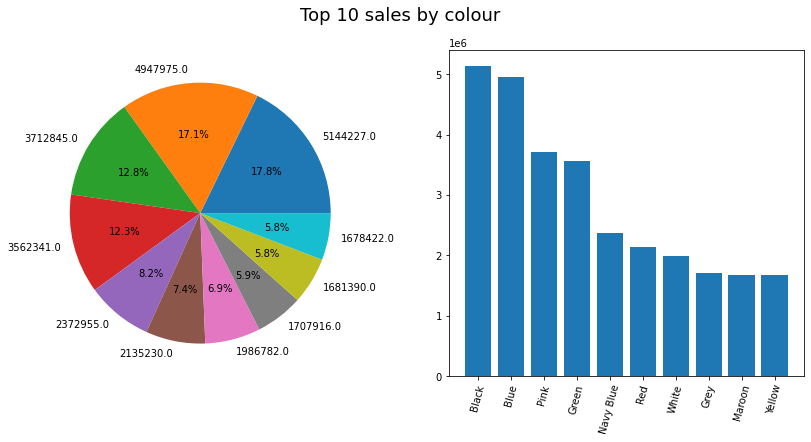

In [369]:
fig, ax = plt.subplots(1,2, figsize=[14,6])
fig.suptitle("Top 10 sales by colour", fontsize=18)

#Pie Chart
labels = top_10_colour
ax[0].pie(top_10_colour,autopct="%.1f%%", labels=labels)

#Bar Chart
plt.bar(top_10_colour.index, top_10_colour.values)
plt.tick_params(axis='x', labelrotation = 75)
plt.tick_params(axis='y', labelrotation = 0)

- Black colour brands have the highest sales of 17.8%, followed by Blue colour brands with 17.1%

#### Top 10 Brands purchased by Customers

In [370]:
top_10_brand = data.groupby('brand_name').CustomerCount.sum().sort_values(ascending=False)[:10]
top_10_brand

brand_name
Sassafras        31352.0
Roadster         25293.0
Ahika            15926.0
Tokyo Talkies    15056.0
Anouk            10944.0
Vishudh          10232.0
Varanga           9214.0
Libas             8093.0
Anubhutee         7996.0
Mitera            5263.0
Name: CustomerCount, dtype: float64

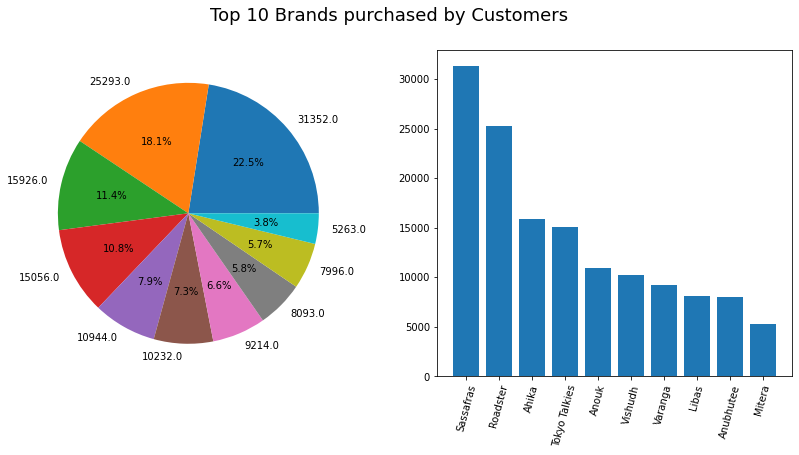

In [371]:
fig, ax = plt.subplots(1,2, figsize=[14,6])
fig.suptitle("Top 10 Brands purchased by Customers", fontsize=18)

#Pie Chart
labels = top_10_brand
ax[0].pie(top_10_brand,autopct="%.1f%%", labels=labels)

#Bar Chart
plt.bar(top_10_brand.index, top_10_brand.values)
plt.tick_params(axis='x', labelrotation = 75)
plt.tick_params(axis='y', labelrotation = 0)

- Sassafras tops the list with 31,352 quantities sold (22.5%), followed by Roadster, with 25,293 quantities (18.1%).

#### Top Rated Brands

In [372]:
top_10_rated = data.groupby('brand_name').avg_rating.mean().sort_values(ascending=False)[:10]
top_10_rated

brand_name
Reebok                       4.833333
Allen Solly Tribe            4.769231
Angel & Rocket               4.727273
Kbz                          4.677419
Dexter By Kook N Keech       4.652174
Juniper Plus                 4.650000
Swishchick                   4.625000
Kook N Keech Looney Tunes    4.625000
Quarantine                   4.600000
Juneberry                    4.600000
Name: avg_rating, dtype: float64

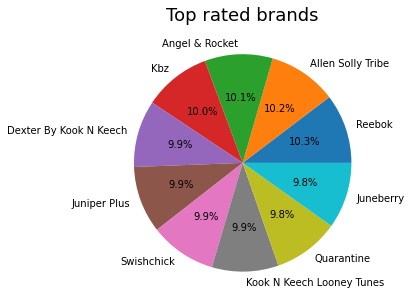

In [373]:
label  = top_10_rated.index
plt.figure(figsize=(5,5))
plt.pie(top_10_rated, autopct='%1.1f%%', labels=label)

plt.title("Top rated brands", fontsize=18)

plt.show()

- Reebok have the highest rating of 4.8

#### Least Rated Brands

In [374]:
least_10_rated = data.groupby('brand_name').avg_rating.mean().sort_values(ascending=True)[:10]
least_10_rated

brand_name
Park Avenue     1.666667
Athlisis        2.800000
Baby Lakshmi    3.000000
Toothless       3.000000
Saadhvi         3.000000
Roly Poly       3.062500
Anahi           3.066667
Triveni         3.200000
Femme Luxe      3.250000
Maiyee          3.250000
Name: avg_rating, dtype: float64

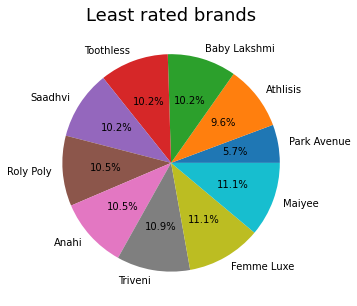

In [375]:
label  = least_10_rated.index
plt.figure(figsize=(5,5))
plt.pie(least_10_rated, autopct='%1.1f%%', labels=label)

plt.title("Least rated brands", fontsize=18)

plt.show()

- Park Avenue has the least customer rating of 1.6

#### Top rated Colours

In [376]:
top_rated_colors = data.groupby('colour').avg_rating.mean().sort_values(ascending=False)[:10]
top_rated_colors

colour
Mauve                4.150852
Fluorescent Green    4.147887
Taupe                4.132997
Khaki                4.125687
Assorted             4.118644
Olive                4.116359
Grey Melange         4.086263
Charcoal             4.080761
Navy Blue            4.073072
Lavender             4.072600
Name: avg_rating, dtype: float64

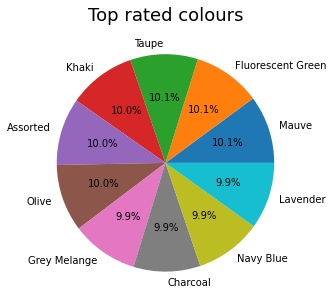

In [377]:
label  = top_rated_colors.index
plt.figure(figsize=(5,5))
plt.pie(top_rated_colors, autopct='%1.1f%%', labels=label)

plt.title("Top rated colours", fontsize=18)

plt.show()

- The colour that has the highest rating is Mauve, followed by Fluorescent Green

#### Least rated Colours

In [378]:
least_rated_colors = data.groupby('colour').avg_rating.mean().sort_values(ascending=True)[:10]
least_rated_colors

colour
Coffee Brown    3.942553
Violet          3.945765
Multi           3.959059
Tan             3.970996
Silver          3.975809
Orange          3.981188
Rose Gold       4.000000
Bronze          4.000000
Champagne       4.000000
Lime Green      4.008432
Name: avg_rating, dtype: float64

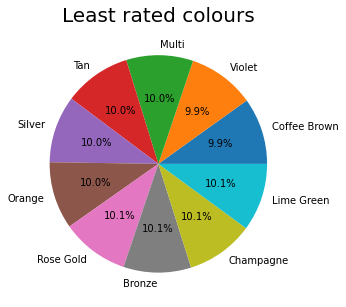

In [379]:
label  = least_rated_colors.index
plt.figure(figsize=(5,5))
plt.pie(least_rated_colors, autopct='%1.1f%%', labels=label)

plt.title("Least rated colours", fontsize=20)

plt.show()

- The colour that has the least rating is Coffee Brown

#### Customer Count and Rating against Price

<AxesSubplot: xlabel='price', ylabel='CustomerCount'>

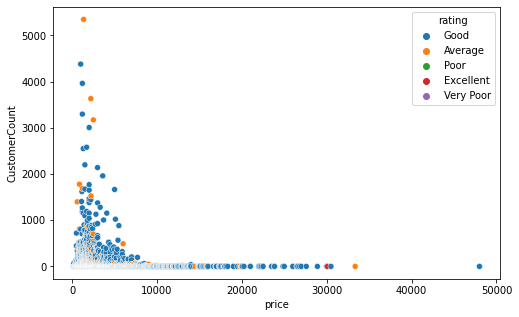

In [380]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=data, x="price", y="CustomerCount", hue = "rating")

- Using scatter plot to display customer count and rating against price, most customers prefer buying products that have price tag of 10000 and below, it also shows that they are satisfied with the products, as they rate them “Good”. This shows that most customers in the fashion store prefer buying products with lesser price than buying the ones that have higher value.

#### Box Plot of Each Ranking Indicator

Text(0.5, 1.0, 'CustomerCount')

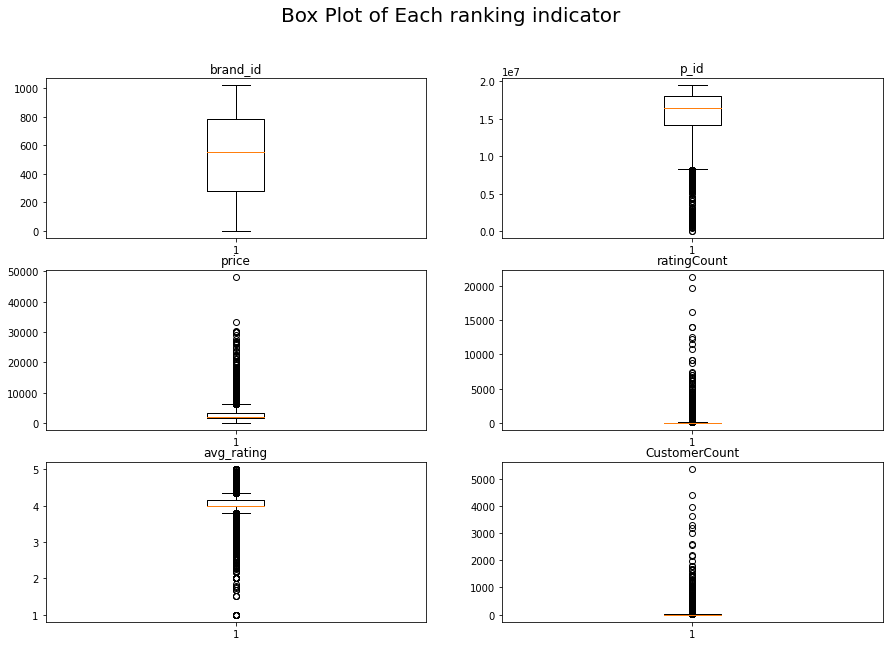

In [381]:
fig, ax = plt.subplots(3,2, figsize=[15,10])
fig.suptitle("Box Plot of Each ranking indicator", fontsize=20)

ax[0,0].boxplot(data['brand_id'])
ax[0, 0].set_title('brand_id')

ax[0,1].boxplot(data['p_id'])
ax[0, 1].set_title('p_id')

ax[1,0].boxplot(data['price'])
ax[1,0].set_title('price')

ax[1,1].boxplot(data['ratingCount'])
ax[1, 1].set_title('ratingCount')

ax[2,0].boxplot(data['avg_rating'])
ax[2,0].set_title('avg_rating')

ax[2,1].boxplot(data['CustomerCount'])
ax[2,1].set_title('CustomerCount')

- There are several outliers which need to be deleted

#### Data Manipulation - Categorical to Numeric
- As machine learning models and preditive analysis cannot be built with data in raw form without being skewed, the label encoder will be used to convert categorical variables to numerical

In [382]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14263 entries, 0 to 14304
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   brand_id       14263 non-null  int64   
 1   brand_name     14263 non-null  object  
 2   p_id           14263 non-null  float64 
 3   name           14263 non-null  object  
 4   price          14263 non-null  float64 
 5   colour         14263 non-null  category
 6   ratingCount    14263 non-null  float64 
 7   avg_rating     14263 non-null  float64 
 8   description    14263 non-null  object  
 9   p_attributes   14263 non-null  object  
 10  NewBrand       14263 non-null  object  
 11  CustomerCount  14263 non-null  float64 
 12  rating         14263 non-null  object  
dtypes: category(1), float64(5), int64(1), object(6)
memory usage: 1.4+ MB


In [383]:
#Use Label Encoder to convert categorical variables to numerical

from sklearn.preprocessing import LabelEncoder

data_sklearn = data

lb_make = LabelEncoder()
data_sklearn['brand_name'] = lb_make.fit_transform(data['brand_name'])
data_sklearn['name'] = lb_make.fit_transform(data['name'])
data_sklearn['colour'] = lb_make.fit_transform(data['colour'])
data_sklearn['description'] = lb_make.fit_transform(data['description'])
data_sklearn['NewBrand'] = lb_make.fit_transform(data['NewBrand'])
data_sklearn['rating'] = lb_make.fit_transform(data['rating'])
data_sklearn['p_attributes'] = lb_make.fit_transform(data['p_attributes'])

data_sklearn.head()

,brand_id,brand_name,p_id,name,price,colour,ratingCount,avg_rating,description,p_attributes,NewBrand,CustomerCount,rating
0,555,554,19000284.0,13566,169.0,33,5.0,4.000000,5019,9475,527,2.0,2
1,555,554,14432274.0,13552,199.0,13,262.0,4.576336,4564,8299,527,58.0,2
2,555,554,14432282.0,13575,199.0,47,308.0,4.464286,4100,8299,527,69.0,2
3,438,437,18988158.0,5348,249.0,47,5.0,4.000000,4083,9474,397,2.0,2
4,431,430,14846678.0,5318,295.0,2,117.0,4.504273,6705,7334,390,26.0,2


- All categorical elements in the data have been converted to numerical and assigned values

In [384]:
#round off variables in float and convert to integer

data['p_id'] = data['p_id'].apply(np.int64)
data['price'] = data['price'].apply(np.int64)
data['ratingCount'] = data['ratingCount'].apply(np.int64)
data['avg_rating'] = data['avg_rating'].apply(np.int64)
data['CustomerCount'] = data['CustomerCount'].apply(np.int64)

print(data.dtypes)

brand_id         int64
brand_name       int32
p_id             int64
name             int32
price            int64
colour           int32
ratingCount      int64
avg_rating       int64
description      int32
p_attributes     int32
NewBrand         int32
CustomerCount    int64
rating           int32
dtype: object


- All float types values in the dataset have now been converted to integers

In [385]:
data.head()

,brand_id,brand_name,p_id,name,price,colour,ratingCount,avg_rating,description,p_attributes,NewBrand,CustomerCount,rating
0,555,554,19000284,13566,169,33,5,4,5019,9475,527,2,2
1,555,554,14432274,13552,199,13,262,4,4564,8299,527,58,2
2,555,554,14432282,13575,199,47,308,4,4100,8299,527,69,2
3,438,437,18988158,5348,249,47,5,4,4083,9474,397,2,2
4,431,430,14846678,5318,295,2,117,4,6705,7334,390,26,2


In [386]:
#check statistical features
data.describe()

,brand_id,brand_name,p_id,name,price,colour,ratingCount,avg_rating,description,p_attributes,NewBrand,CustomerCount,rating
count,14263.000000,14263.000000,1.426300e+04,14263.000000,14263.000000,14263.000000,14263.000000,14263.000000,14263.000000,14263.000000,14263.000000,14263.000000,14263.000000
mean,531.674332,530.683587,1.569040e+07,6938.271542,2968.048167,21.354554,87.228984,3.853397,7114.577228,6682.409451,532.837622,21.694875,1.747669
std,292.420210,292.447255,3.152970e+06,4003.691241,2566.982531,15.499590,536.926729,0.412983,4106.999314,3800.197403,292.860200,129.330640,0.690037
min,1.000000,0.000000,7.016600e+04,0.000000,169.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,278.000000,277.000000,1.413744e+07,3471.500000,1599.000000,3.000000,5.000000,4.000000,3558.500000,3396.500000,291.000000,2.000000,2.000000
50%,551.000000,550.000000,1.638204e+07,6955.000000,2200.000000,24.000000,5.000000,4.000000,7115.000000,6696.000000,541.000000,2.000000,2.000000
75%,783.000000,782.000000,1.807606e+07,10390.500000,3497.500000,34.000000,19.000000,4.000000,10670.500000,10016.500000,780.000000,5.000000,2.000000
max,1020.000000,1019.000000,1.941576e+07,13879.000000,47999.000000,48.000000,21274.000000,5.000000,14229.000000,13093.000000,1019.000000,5348.000000,4.000000


#### Checking and deleting Outliers

Outliers are extreme data points that can have an impact on statistical analysis. 

In [387]:
import scipy.stats as stats

In [388]:
#find Q1, Q3, and interquartile range for each column
Q1 = data.quantile(q=.25)
Q3 = data.quantile(q=.75)
IQR = data.apply(stats.iqr)

#only keep rows in dataframe that have values within 1.5*IQR of Q1 and Q3
data_clean = data[~((data < (Q1-1.5*IQR)) | (data > (Q3+1.5*IQR))).any(axis=1)]

#find how many rows are left in the dataframe 
data_clean.shape

(9236, 13)

#### Normalzing the Dataset
Machine learning algorithms tend to perform better or converge faster when the different features (variables) are on a smaller scale. Therefore it is common practice to normalize the data before training machine learning models on it.Normalization also makes the training process less sensitive to the scale of the features. This results in getting better coefficients after training.


In [389]:
scaler = preprocessing.MinMaxScaler()
names = data_clean.columns
d = scaler.fit_transform(data_clean)
scaled_df = pd.DataFrame(d, columns=names)
scaled_df.head()

,brand_id,brand_name,p_id,name,price,colour,ratingCount,avg_rating,description,p_attributes,NewBrand,CustomerCount,rating
0,0.543670,0.543670,0.962695,0.977448,0.000000,0.687500,0.102564,0.0,0.352730,0.724312,0.517174,0.125,0.0
1,0.428852,0.428852,0.961606,0.385330,0.012962,0.979167,0.102564,0.0,0.286949,0.724235,0.389598,0.125,0.0
2,0.815505,0.815505,0.604578,0.763095,0.020901,0.583333,0.358974,0.0,0.737016,0.926300,0.819431,0.375,0.0
3,0.543670,0.543670,0.627460,0.975647,0.021063,0.020833,0.384615,0.0,0.391243,0.927523,0.517174,0.375,0.0
4,0.543670,0.543670,0.627462,0.976367,0.021063,0.250000,0.333333,0.0,0.556118,0.927523,0.517174,0.375,0.0


#### Data Correlation
Correlation is a statistical metric that reflects how tightly two variables are related linearly, which means they change at the same pace. It is a common strategy for conveying simple relationships, without directly declaring cause and effect.
It is a measure of how items relate to one another. In this data set, the relationship between target (price) and other variables are analysed with correlation.


In [390]:
scaled_df.corr()

,brand_id,brand_name,p_id,name,price,colour,ratingCount,avg_rating,description,p_attributes,NewBrand,CustomerCount,rating
brand_id,1.000000,0.999992,0.063133,0.884120,0.054093,-0.019136,0.028593,NaN,-0.040415,0.000575,0.734194,0.028641,NaN
brand_name,0.999992,1.000000,0.063062,0.884135,0.054321,-0.019151,0.028650,NaN,-0.040267,0.000702,0.734174,0.028697,NaN
p_id,0.063133,0.063062,1.000000,0.072723,0.082755,-0.009492,-0.319339,NaN,-0.214350,-0.082223,0.053188,-0.299920,NaN
name,0.884120,0.884135,0.072723,1.000000,0.020494,-0.013539,0.032739,NaN,-0.037524,0.003366,0.667484,0.032192,NaN
price,0.054093,0.054321,0.082755,0.020494,1.000000,0.004915,-0.085904,NaN,0.124778,-0.147598,0.022450,-0.081636,NaN
colour,-0.019136,-0.019151,-0.009492,-0.013539,0.004915,1.000000,-0.007651,NaN,0.355302,0.075368,-0.010024,-0.008999,NaN
ratingCount,0.028593,0.028650,-0.319339,0.032739,-0.085904,-0.007651,1.000000,NaN,0.002519,-0.022594,0.049588,0.989629,NaN
avg_rating,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
description,-0.040415,-0.040267,-0.214350,-0.037524,0.124778,0.355302,0.002519,NaN,1.000000,0.178980,-0.045750,0.002443,NaN
p_attributes,0.000575,0.000702,-0.082223,0.003366,-0.147598,0.075368,-0.022594,NaN,0.178980,1.000000,0.001399,-0.021218,NaN


<AxesSubplot: >

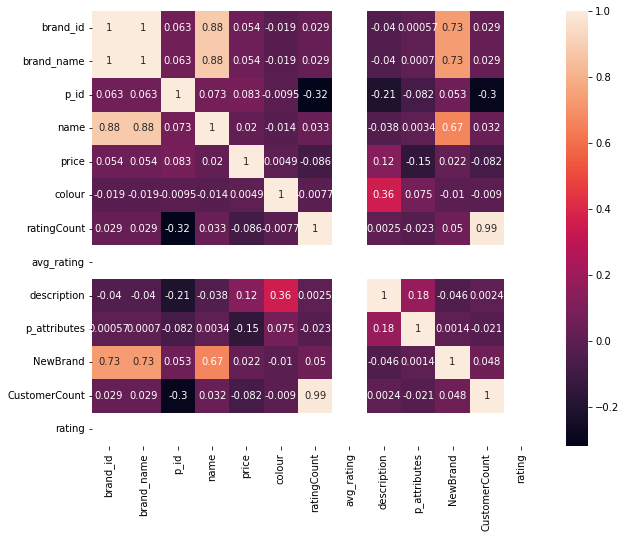

In [391]:
plt.figure(figsize=(10,8))
sns.heatmap(scaled_df.corr(),annot=True)

- avg_rating and rating do not correlate very well with the price, they will not be considered in the model and will be dropped during feature selection.

#### Import ML algorithms and initialize them
In this process, four regression models are built and trained, which are Random Forest, Decision Tree Regressor, Support Vector Regression, and Gradient Boosting Regressor. 
First, we define a variable to store the model algorithm, next, we fit the train set variables into the model, and finally make some predictions in the test set.

In [392]:
#import and load libraries
import sklearn

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import accuracy_score, classification_report
from sklearn import tree
import seaborn as sns

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

from sklearn.model_selection import train_test_split

#### Select Target

In [393]:
y = scaled_df.price

In [394]:
y.head()

0    0.000000
1    0.012962
2    0.020901
3    0.021063
4    0.021063
Name: price, dtype: float64

#### Select Features
- We are dropping 'price' column, since 'price' is our target. Avg_rating and rating columns will also be dropped, since both variables have no correlation with price


In [396]:
features = scaled_df.drop(["price", 'avg_rating', 'rating'],axis=1)
features.shape

(9236, 10)

In [397]:
X = scaled_df[features.columns]

#### Train Test Split

In [398]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=42)

#### Random Forest Regressor

In [399]:
RF_model = RandomForestRegressor()

In [400]:
#fit the model on the training data
RF_model.fit(X_train, y_train)

RandomForestRegressor()

In [401]:
#predict on test data
preds_RF = RF_model.predict(X_test)

In [402]:
RF_model.score(X_test, y_test)

0.6207330061331241

In [403]:
print('Actual prices:', y_test.head().tolist())
print('Predicted prices:', preds_RF[:5])

Actual prices: [0.0696694750486066, 0.29650032404407, 0.2154893065456902, 0.16688269604666234, 0.3371678548282566]
Predicted prices: [0.09363415 0.31893065 0.31125891 0.22108555 0.27751134]


In [404]:
mae_RF = mean_absolute_error(y_test,preds_RF)
print(mae_RF)

0.09161388096742183


In [405]:
mse_RF = mean_squared_error(y_test,preds_RF)
print(mse_RF)

0.016417627251488758


In [406]:
r2_RF = r2_score(y_test, preds_RF) #coefficient of determination
print(r2_RF)

0.6207330061331241


#### Decision Tree Regressor

In [407]:
DT_model = DecisionTreeRegressor()

In [408]:
DT_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [409]:
preds_DT = DT_model.predict(X_test)

In [410]:
DT_model.score(X_test, y_test)

0.283334559380762

In [411]:
print('Actual prices:', y_test.head().tolist())
print('Predicted prices:', preds_DT[:5])

Actual prices: [0.0696694750486066, 0.29650032404407, 0.2154893065456902, 0.16688269604666234, 0.3371678548282566]
Predicted prices: [0.05346727 0.18794556 0.13447829 0.1749838  0.18292288]


In [412]:
mae_DT = mean_absolute_error(y_test,preds_DT)
print(mae_DT)

0.11717537648635191


In [413]:
mse_DT = mean_squared_error(y_test,preds_DT)
print(mse_DT)

0.031022857929578995


In [414]:
r2_DT = r2_score(y_test, preds_DT) #coefficient of determination
print(r2_DT)

0.283334559380762


#### Support Vector Regression

In [415]:
SVR_model = SVR()

In [416]:
SVR_model.fit(X_train, y_train)

SVR()

In [417]:
preds_SVR = SVR_model.predict(X_test)

In [418]:
print('Actual prices:', y_test.head().tolist())
print('Predicted prices:', preds_SVR[:5])

Actual prices: [0.0696694750486066, 0.29650032404407, 0.2154893065456902, 0.16688269604666234, 0.3371678548282566]
Predicted prices: [0.16894343 0.39891364 0.42341152 0.37251194 0.3222024 ]


In [419]:
mae_SVR = mean_absolute_error(y_test,preds_SVR)
print(mae_SVR)

0.1426462949451954


In [420]:
mse_SVR = mean_squared_error(y_test,preds_SVR)
print(mse_SVR)

0.0353378080346414


In [421]:
r2_SVR = r2_score(y_test, preds_SVR) #coefficient of determination
print(r2_SVR)

0.18365400688897737


#### Gradient Boosting Regressor

In [422]:
GBR_model=GradientBoostingRegressor(n_estimators=100, max_depth=5, min_samples_split=2,learning_rate=0.2)

In [423]:
GBR_model.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.2, max_depth=5)

In [424]:
preds_GBR=GBR_model.predict(X_test)

In [425]:
GBR_model.score(X_test, y_test)

0.6089034479894039

In [426]:
print('Actual prices:', y_test.head().tolist())
print('Predicted prices:', preds_GBR[:5])

Actual prices: [0.0696694750486066, 0.29650032404407, 0.2154893065456902, 0.16688269604666234, 0.3371678548282566]
Predicted prices: [0.0509019  0.4226067  0.40552655 0.23165514 0.32742175]


In [427]:
mae_GBR = mean_absolute_error(y_test,preds_GBR)
print(mae_GBR)

0.09704239476270897


In [428]:
mse_GBR = mean_squared_error(y_test,preds_GBR)
print(mse_GBR)

0.01692970259496455


In [429]:
errors = mean_squared_error(y_test,preds_GBR, squared=False)
print(errors)

0.1301141905979688


In [430]:
r2_GBR = r2_score(y_test, preds_GBR) #coefficient of determination
print(r2_GBR)

0.6089034479894039


#### Calculating Mean Absolute Error

In [431]:
mae_RF = mean_absolute_error(y_test,preds_RF)
mae_DT = mean_absolute_error(y_test,preds_DT)
mae_SVR = mean_absolute_error(y_test,preds_SVR)
mae_GBR = mean_absolute_error(y_test,preds_GBR)


print('Mean Absolute Error with Random Forest: ',mae_RF)
print('Mean Absolute Error with Decision Tree: ',mae_DT)
print('Mean Absolute Error with Support Vector Regression: ',mae_SVR)
print('Mean Absolute Error with Gradient Boosting Regressor: ',mae_GBR)


Mean Absolute Error with Random Forest:  0.09161388096742183
Mean Absolute Error with Decision Tree:  0.11717537648635191
Mean Absolute Error with Support Vector Regression:  0.1426462949451954
Mean Absolute Error with Gradient Boosting Regressor:  0.09704239476270897


#### Calculating Mean Squared Error

In [432]:
mse_RF = mean_squared_error(y_test,preds_RF)
mse_DT = mean_squared_error(y_test,preds_DT)
mse_SVR = mean_squared_error(y_test,preds_SVR)
mse_GBR = mean_squared_error(y_test,preds_GBR)


print('Mean Squared Error with Random Forest: ',mse_RF)
print('Mean Squared Error with Decision Tree: ',mse_DT)
print('Mean Squared Error with Support Vector Regression: ',mse_SVR)
print('Mean Squared Error with Gradient Boosting Regressor: ',mse_GBR)

Mean Squared Error with Random Forest:  0.016417627251488758
Mean Squared Error with Decision Tree:  0.031022857929578995
Mean Squared Error with Support Vector Regression:  0.0353378080346414
Mean Squared Error with Gradient Boosting Regressor:  0.01692970259496455


#### Coefficient of determination

In [433]:
r2_RF = r2_score(y_test,preds_RF)
r2_DT = r2_score(y_test,preds_DT)
r2_SVR = r2_score(y_test,preds_SVR)
r2_GBR = r2_score(y_test,preds_GBR)


print('Coefficient of detremination with Random Forest: ',r2_RF)
print('Coefficient of detremination with Decision Tree: ',r2_DT)
print('Coefficient of detremination with Support Vector Regression: ',r2_SVR)
print('Coefficient of detremination with Gradient Boosting Regressor: ',r2_GBR)

Coefficient of detremination with Random Forest:  0.6207330061331241
Coefficient of detremination with Decision Tree:  0.283334559380762
Coefficient of detremination with Support Vector Regression:  0.18365400688897737
Coefficient of detremination with Gradient Boosting Regressor:  0.6089034479894039


In [434]:
ML_models = pd.DataFrame({
    'Model': ['Random Forest Regressor','Decision Tree Regressor','Support Vector Regression',\
              'Gradient Boosting Regressor'],
    'MAE': [mae_RF,mae_DT,mae_SVR,mae_GBR],
    'MSE': [mse_RF,mse_DT,mse_SVR,mse_GBR],
    'COE': [r2_RF,r2_DT,r2_SVR,r2_GBR]})
    
Best_Model = ML_models.sort_values(by='MAE')
Best_Model

,Model,MAE,MSE,COE
0,Random Forest Regressor,0.091614,0.016418,0.620733
3,Gradient Boosting Regressor,0.097042,0.016930,0.608903
1,Decision Tree Regressor,0.117175,0.031023,0.283335
2,Support Vector Regression,0.142646,0.035338,0.183654


- Random Forest Regression model surpasses all other models and has the least errors and the highest R-squared value, which makes it the best-performing model.